<hr/>

<b>Notebook Summary</b>

These notes are based on Prof. Norman Wildberger's lectures on Dynamics on Graphs which can be found <a href="https://www.youtube.com/c/WildEggmathematicscourses/featured">here</a>. 
    
They notes are are being hosted at my website <a href="https://www.ladatavita.com/">ladatavita.com</a> and the Jupyter notebook is also available from my Github repo at: <a href="https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks">https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks</a>

The purpose of this notebook is a continuation where we left off in the previous notebook ES2, which compared the root populations of ADE graphs and ADE~ graph. 

This notebook will continue the investigation.... 

<hr/>

In [226]:
import pyvis.network as nt
import numpy as np
import sympy as sp
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import networkx as nx
import string
import random

<hr/>

<b>Aim</b>: Reintroduce some functions from previous notebooks and add a new visualisation and function to introduce stable populations

<hr/>

<b>Let</b> $F1$ is a function that, given a list of edges will create a graph and randomly initialise a singleton population. 

<b>Let</b> $F2$ is a function that, given a list of edges and poopuations, will create a graph with the given population. 

<b>Let</b> $F3$ is a visualisation function that will render a graph with its population with label position offset

<b>Let</b> $F4$ is a function that, given a graph and node choice, will apply the $ps_x$ function to a single vertice

<b>Let</b> $F5$ is a function that will apply the $ps_x$ function to each node in succession over a chosen number of iterations

In [235]:
def F1(edges=None):
    
    verticeLabels = list(set([item for sublist in edges for item in sublist]))
    randomNumberToIntialiseSingletonPopulation = random.randint(0, len(verticeLabels) - 1)

    vertices = [(verticeLabels[i], {"population": 0}) for i in range(len(verticeLabels))]
    graph = nx.Graph()
    graph.add_nodes_from(vertices)
    graph.add_edges_from(edges)
    
    graph.nodes[verticeLabels[randomNumberToIntialiseSingletonPopulation]]['population'] = 1
    
    return(graph)

def F2(edges=None, population = None):
    
    verticesFoundInEdges = len(list(set([item for sublist in edges for item in sublist])))

 
    vertices = list(string.ascii_lowercase[0:verticesFoundInEdges])
    
    verticesWithPopulations = [(vertices[i], {"population": population[i]}) for i in range(len(vertices))]

    graph = nx.Graph()
    graph.add_nodes_from(verticesWithPopulations)
    graph.add_edges_from(edges)
    

    return(graph)
        
    
    
def F3(graph):
    pos = nx.spring_layout(graph)
    labels = nx.get_node_attributes(graph, 'population') 
    for i in labels:
        x[i] = "id=" + str(i) +" \npop=" + str(labels[i])
        
    plt.margins(x=0.2, y = 0.2)
    nx.draw(, pos, node_color = "red")
    nx.draw_networkx_labels(F4, pos, labels = x, font_size=13,font_color='b', horizontalalignment='left')

In [242]:
def F4(graph = None, nodeChoice = None, printSummary = True, 
       returnUpdatedGraph = False, 
       returnListOfPopulations = False,
      returnAllAsDict = False):
   
    edgesOfChosenNode = list(nx.edges(graph, [nodeChoice]))
   
    neigborOfChosenNode = [edgesOfChosenNode[i][1] for i in range(len(list(edgesOfChosenNode)))]
    nodeChoicePopulation = graph.nodes[nodeChoice]['population']
    sumOfNeighborsOfChosenNode = np.sum([graph.nodes[i]['population'] for i in neigborOfChosenNode])
    populationOfNode = -nodeChoicePopulation + sumOfNeighborsOfChosenNode
    updatedGraph = graph.copy()
    updatedGraph.nodes[nodeChoice]['population'] = populationOfNode

    newPopulations = [updatedGraph.nodes[i]['population'] for i in list(updatedGraph)]
    if printSummary:
        print("Node choice", 
              nodeChoice,
              "\nNode details",
              nx.nodes(graph)[nodeChoice],
              "\nChange in node population ",
              nx.nodes(graph)[nodeChoice]['population'], 
              "->", 
              populationOfNode)
        print("Updated node populations of graph: ", newPopulations, "\n")

    if returnUpdatedGraph: 
        return(updatedGraph)
    
    if returnListOfPopulations:
        return(np.array(newPopulations))
    
    if returnAllAsDict:
        return({"graph": updatedGraph,
               "population": np.array(newPopulations)})
    
def F5(graphChoice=None, vertices = [], iterations=5, returnPopulations = True, iterateThroughAllVertices = True):
    listOfAllPopulations = []
    graph = graphChoice
    
    if iterateThroughAllVertices:
        vertices = graph.nodes
    
    for i in range(iterations):
        for j in vertices:
            udpatedGraphAndPopulation = F4(graph, j, returnAllAsDict=True, printSummary = False)
            graph = udpatedGraphAndPopulation['graph']
            population = udpatedGraphAndPopulation['population']
            listOfAllPopulations.append(population)
            
    print("Number of unique populations: ", len(list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))))
    if returnPopulations:
        setOfAllPopulations = list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))
        return({"iterations":iterations,
               "populationAsSetCount":len(setOfAllPopulations),
                "populationAsListCount":len(listOfAllPopulations),
               "populationsAsSet": setOfAllPopulations,
               "populationsAsList": listOfAllPopulations})

<b>Let</b> $F6$ be an example of a graph 

In [243]:
F6= F2(edges=[("a","b"),("b","c"),("c","d"),("d","e"),("e","f"), ("f", "a")], 
       population=[1,2,3,4,5,6])
#F3(F6)

<b>Let</b> $F7$ be a visualisation of $F6$

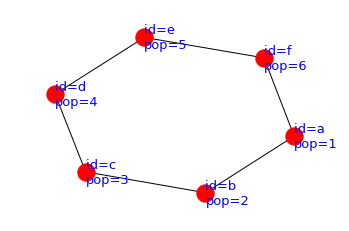

In [247]:
F7 = F3(F6)
F7

<b>Let</b> $F8$ be an example

In [251]:
F8 = F5(graphChoice=F6, iterations=10, returnPopulations=True)
F8['populationsAsSet'][0:3]

Number of unique populations:  60


[(55, 56, 57, 58, 59, 54), (37, 38, 33, 34, 35, 36), (19, 20, 21, 22, 17, 18)]

<hr/>

<b>Aim</b> Explore the ADE~ graphs in more detail to understand their importance and independent of interest, and realtion to stagle population

<hr/>

<b>Let</b> $X$ be a connected simple graph. 

<b>Let</b> $P(X) \equiv \text{populations on } X$.

<b>Recall</b> that for a the vertex, $x$ in the graph $X$, the population function $S_x:P(x)  \rightarrow P(X)$ is defined by: 

$$ ps_x(y) \equiv  \begin{cases}
    -p(x) + \Sigma_{z \in N(x)} \text{ }  p(z) & \text{if y = x}\\
    p(y) & \text{otherwise}
\end{cases}
$$ 

<b>Definition</b>: A population, $p \in P(X)$ is <b>stable</b> $\iff$ $ps_x = p$ for any vertex $x$ of a connected simple graph $X$, meaning that it is left invariant under every mutation and that population will not change when the mutation function is applied.

<b>Observe</b> that this is immedieately equivalent to the condition: 

$$ 2p(x) = \Sigma_{z\in N(x)} p(z) $$

for any vertex $x$ of $X$ or

$$ p(x) = \frac{1}{2} \Sigma_{z \in N(x)} p(z) $$

<b>Let</b> $F9